In [325]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.model_selection import GridSearchCV

[nltk_data] Downloading package stopwords to C:\Users\BERNARD OWENS
[nltk_data]     W\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\BERNARD OWENS
[nltk_data]     W\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\BERNARD OWENS
[nltk_data]     W\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [294]:
# Load dataset
df = pd.read_csv("BBC News Train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


In [295]:
# Cek banyaknya value
df['Category'].value_counts()

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64

In [313]:
# Label Encoding untuk digunakan sebagai EDA
le = LabelEncoder()
df['category_id'] = le.fit_transform(df['Category'])
df.head()

,ArticleId,Text,Category,category_id
0,1833,worldcom ex bos launch defence lawyer defendin...,business,0
1,154,german business confidence slide german busine...,business,0
2,1101,bbc poll indicates economic gloom citizen majo...,business,0
3,1976,lifestyle governs mobile choice faster better ...,tech,4
4,917,enron boss 168m payout eighteen former enron d...,business,0


### EDA

In [297]:
# Cek Null value
df.isnull().sum()

ArticleId      0
Text           0
Category       0
category_id    0
dtype: int64

In [298]:
# Cek Duplicate Value
df.duplicated().sum()

0

In [299]:
# Describe dataset
df.describe()

,ArticleId,category_id
count,1490.000000,1490.000000
mean,1119.696644,1.948322
std,641.826283,1.420142
min,2.000000,0.000000
25%,565.250000,1.000000
50%,1112.500000,2.000000
75%,1680.750000,3.000000
max,2224.000000,4.000000


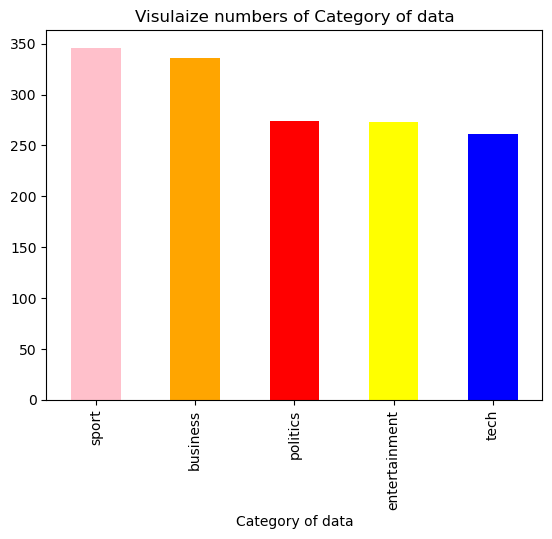

In [300]:
# Visualisasi relasi antar dataset menggunakan bar plot
df.Category.value_counts().plot(kind = "bar", color = ["pink", "orange", "red", "yellow", "blue"])
plt.xlabel("Category of data")
plt.title("Visulaize numbers of Category of data")
plt.show()

C:\Users\BERNARD OWENS W\AppData\Local\Temp\ipykernel_17948\1760633978.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)


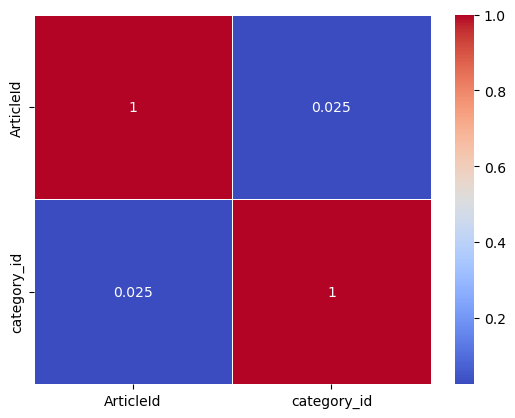

In [301]:
# Visualisasi relasi antar dataset menggunakan heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

### PreProcessing

In [302]:
# Mengubah text menjadi lowercase
def convert_lower(text):
   return text.lower()
df['Text'] = df['Text'].apply(convert_lower)

In [303]:
# Remove HTML tags dari text jika ada
def remove_tags(text):
  remove = re.compile(r'<.*?>')
  return re.sub(remove, '', text)
df['Text'] = df['Text'].apply(remove_tags)

In [304]:
# Remove special character atau punctuation seperti r'^[\w.-]+@[\w-]+.\w{2,3}(.\w{2,3})?$
def special_char(text):
  reviews = ''
  for x in text:
    if x.isalnum():
      reviews = reviews + x
    else:
      reviews = reviews + ' '
  return reviews
df['Text'] = df['Text'].apply(special_char)

In [314]:
# Remove Stopwords
# stopwords -> kata-kata yang maknanya tidak terlalu penting dalam proses klasifikasi NLP dan bisa dihilangkan
def remove_stopwords(text):
  stop_words = set(stopwords.words('english'))
  words = word_tokenize(text)
  return [x for x in words if x not in stop_words]
df['Text'] = df['Text'].apply(remove_stopwords)

In [306]:
# Melakukan lemmatizing
# lemmatize -> pemrosesan bahasa alami untuk mengubah bentuk kata ke bentuk dasar atau lema
def lemmatize_word(text):
  wordnet = WordNetLemmatizer()
  return " ".join([wordnet.lemmatize(word) for word in text])
df['Text'] = df['Text'].apply(lemmatize_word)

### Splitting dataset

In [307]:
# Memisahkan antara dependant dan independant variable serta melakukan splitting
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(df.Text).toarray()
y = np.array(df.category_id.values)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle = True)

### Model Training

In [308]:
# Kita disini load model
rfc = RandomForestClassifier()
# Train modelnya
rfc.fit(x_train, y_train) 
# Lalu, melakukan prediksi model
y_pred = rfc.predict(x_test)
# Print evaluation metrics
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
print(f'Test Accuracy Score of Basic Logistic Regression: % {accuracy}\n')
print(classification_report(y_test, y_pred))

Test Accuracy Score of Basic Logistic Regression: % 95.08

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       103
           1       0.96      0.98      0.97        89
           2       0.97      0.90      0.94        81
           3       0.96      0.99      0.97        97
           4       0.99      0.87      0.92        77

    accuracy                           0.95       447
   macro avg       0.96      0.95      0.95       447
weighted avg       0.95      0.95      0.95       447



### Hyperparameter Tuning
mencari parameter yang paling bagus untuk model yang kita gunakan menggunakan GridSearchCV

In [309]:
para_dist = {
  'n_estimators':[100, 200, 300],
  'min_samples_split': [2, 4, 6, 8],
  'max_depth': [None, 10, 20, 30, 40, 50] 
}

rfcT = GridSearchCV(rfc, para_dist, cv=5)
rfcT.fit(x_train, y_train)
print(f"Best param = {rfcT.best_params_}")

Best param = {'max_depth': None, 'min_samples_split': 4, 'n_estimators': 200}


In [330]:
# Disini kita menggunakan parameter yang sudah disarankan saat kit menggunakan GridSearchCV
rfc2 = RandomForestClassifier(max_depth= None, min_samples_split =  4, n_estimators= 200)
rfc2.fit(x_train, y_train) 
y_pred2 = rfc2.predict(x_test)
accuracy2 = round(accuracy_score(y_test, y_pred2) * 100, 2)
print(f'Test Accuracy Score of Basic Logistic Regression: % {accuracy2}\n')
print(classification_report(y_test, y_pred2))

Test Accuracy Score of Basic Logistic Regression: % 95.97

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       103
           1       0.98      0.97      0.97        89
           2       0.97      0.90      0.94        81
           3       0.97      0.99      0.98        97
           4       0.99      0.94      0.96        77

    accuracy                           0.96       447
   macro avg       0.96      0.96      0.96       447
weighted avg       0.96      0.96      0.96       447

